Loaded dataset: 500 rows, 14 columns
Missing values handled.
Outliers removed. Remaining rows: 405


,Customer_ID,Age,Gender,Income,Spending_Score,Credit_Score,Loan_Amount,Previous_Defaults,Marketing_Spend,Purchase_Frequency,Seasonality,Sales,Customer_Churn,Defaulted
0,1,56,Female,142418.000000,7,391.0,8083.000000,1,15376,3,Low,32526,0,0
1,2,69,Male,63088.000000,82,652.0,34328.000000,2,6889,6,Low,78493,0,0
2,3,46,Male,136868.000000,91,662.0,47891.000000,2,6054,29,Medium,57198,1,0
3,4,32,Female,84398.055556,34,644.0,25103.000000,2,4868,8,Medium,48395,0,0
4,5,60,Male,59811.000000,91,469.0,44891.000000,1,17585,12,High,29031,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,495,49,Female,83731.000000,33,586.0,28252.000000,0,4644,9,High,40944,1,0
401,496,65,Male,69688.000000,6,602.0,20261.000000,2,7420,17,High,43134,0,0
402,497,42,Female,119929.000000,88,610.0,6431.000000,2,12837,27,Medium,32323,0,0
403,499,62,Male,93509.000000,80,745.0,42481.000000,0,11541,12,High,92225,0,0


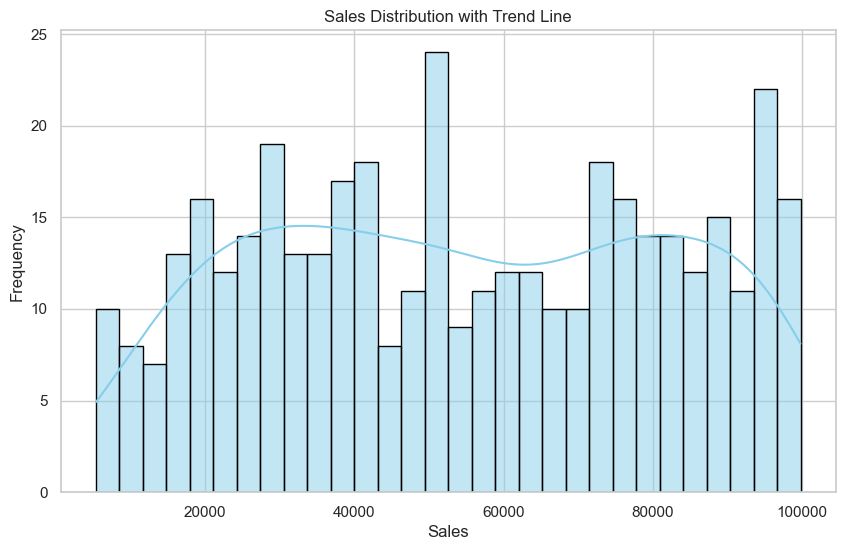

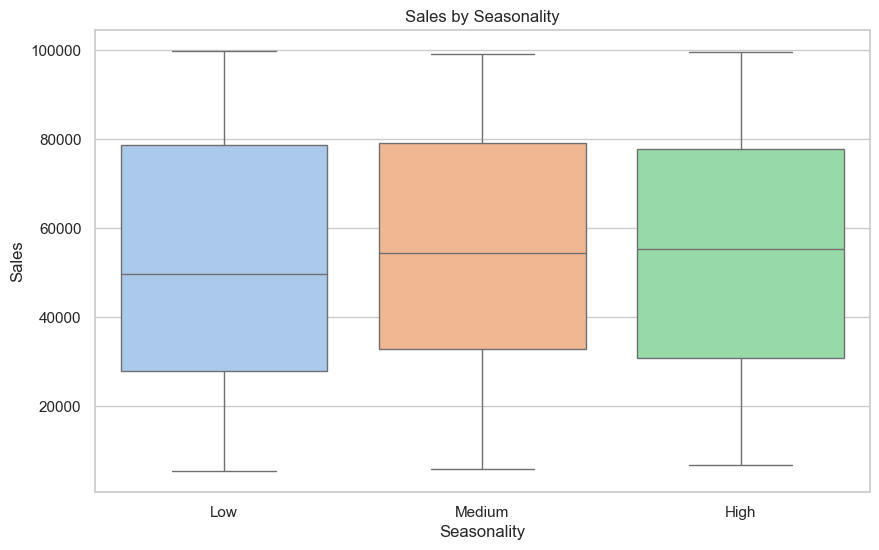

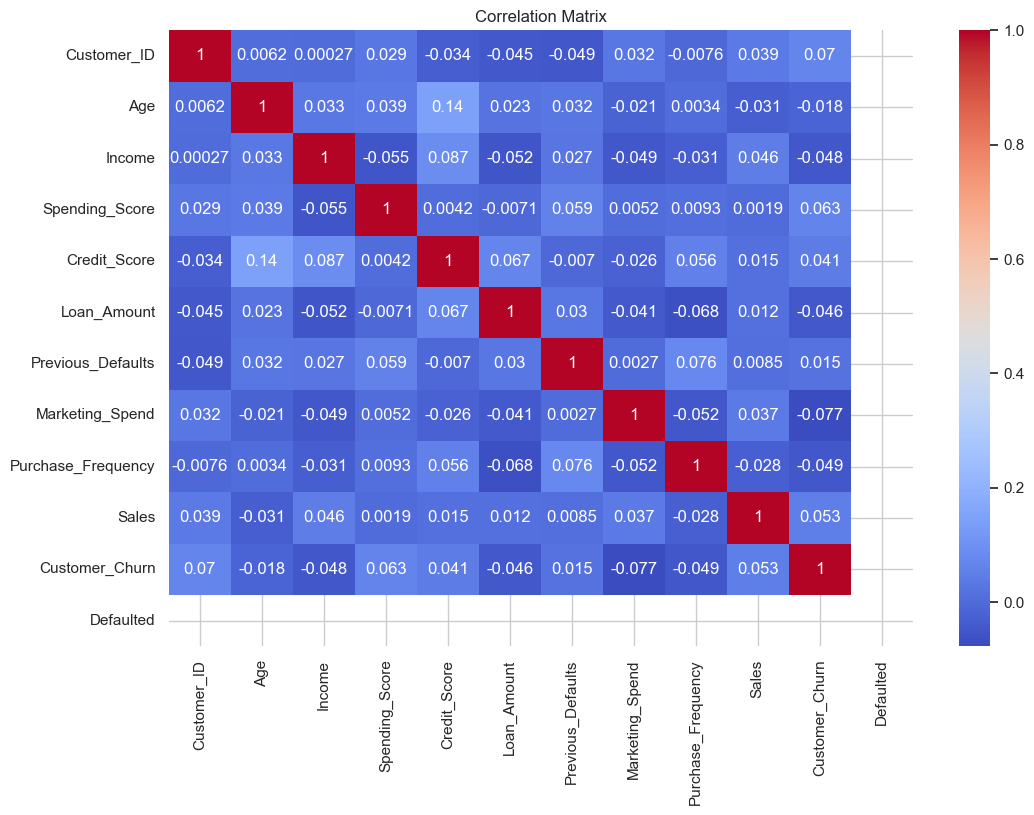

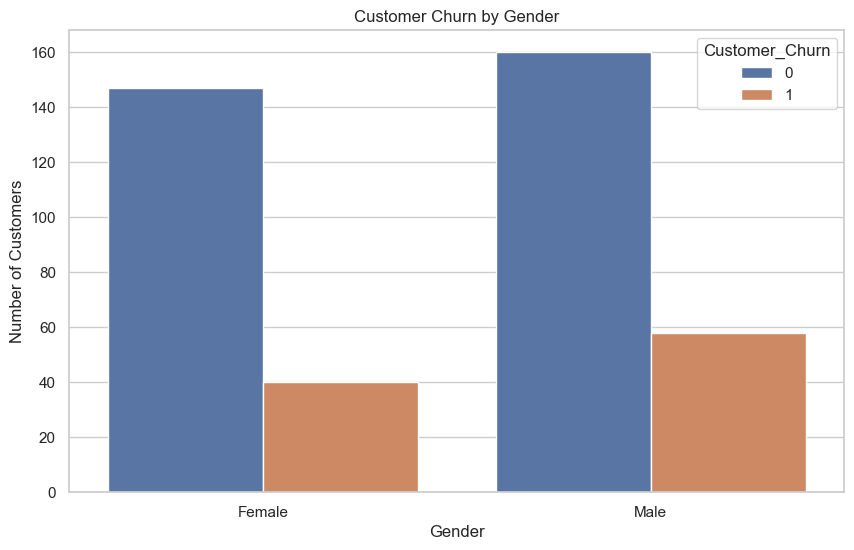

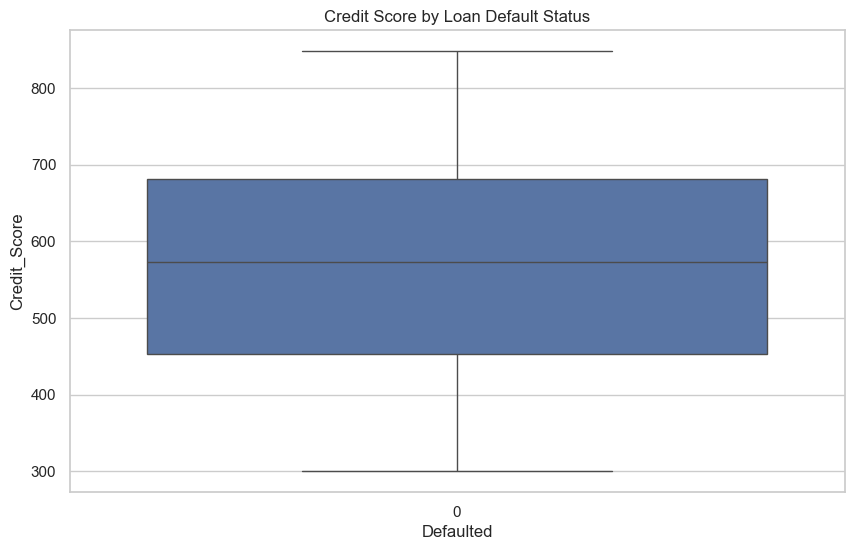


=== Linear Regression Model: Sales → Spending_Score ===
Intercept: 51.20
Coefficient: -0.00
R² Score: -0.00
Mean Squared Error: 842.03

=== Columns for Multivariable Regression ===
['Customer_ID', 'Age', 'Gender', 'Income', 'Spending_Score', 'Credit_Score', 'Loan_Amount', 'Previous_Defaults', 'Marketing_Spend', 'Purchase_Frequency', 'Seasonality', 'Sales', 'Customer_Churn', 'Defaulted']
3/3 [==============================] - 0s 3ms/step

=== TensorFlow Regression Model: Marketing_Spend + Seasonality → Sales ===
R² Score: -0.82
Mean Squared Error: 1336330368.00


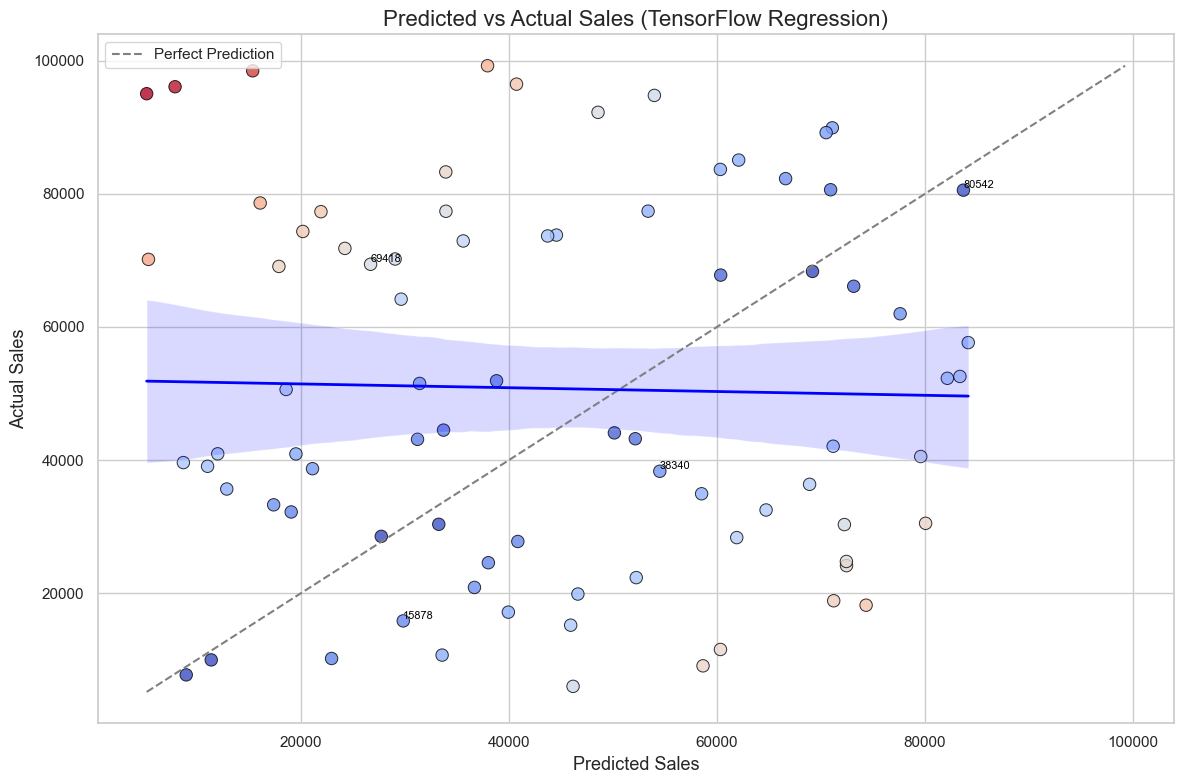

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import display
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

warnings.filterwarnings("ignore")  # Suppress warnings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# === Load Dataset ===
df = pd.read_csv(r"C:\Users\angel\OneDrive\Documents\raw_dataset_week4.csv")
print(f"Loaded dataset: {df.shape[0]} rows, {df.shape[1]} columns")

# === Handle Missing Values ===
df_numeric = df.select_dtypes(include=[np.number])
df[df_numeric.columns] = df_numeric.fillna(df_numeric.mean())

df_categorical = df.select_dtypes(include=['object'])
for col in df_categorical.columns:
    df[col] = df[col].fillna(df[col].mode()[0])

print("Missing values handled.")

# === Remove Outliers Using IQR ===
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df[~((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).any(axis=1)].copy()
df_cleaned.reset_index(drop=True, inplace=True)

print(f"Outliers removed. Remaining rows: {df_cleaned.shape[0]}")

# === Display Cleaned Table ===
display(df_cleaned)

# === 1. Sales Distribution with KDE Trend Line ===
if 'Sales' in df_cleaned.columns:
    sns.histplot(df_cleaned['Sales'], kde=True, bins=30, color='skyblue', edgecolor='black')
    plt.title("Sales Distribution with Trend Line")
    plt.xlabel("Sales")
    plt.ylabel("Frequency")
    plt.show()

# === 2. Sales by Seasonality ===
if {'Seasonality', 'Sales'}.issubset(df_cleaned.columns):
    sns.boxplot(x='Seasonality', y='Sales', data=df_cleaned, palette='pastel')
    plt.title("Sales by Seasonality")
    plt.show()

# === 3. Correlation Heatmap ===
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# === 4. Customer Churn by Gender ===
if {'Gender', 'Customer_Churn'}.issubset(df_cleaned.columns):
    sns.countplot(x='Gender', hue='Customer_Churn', data=df_cleaned)
    plt.title("Customer Churn by Gender")
    plt.ylabel("Number of Customers")
    plt.show()

# === 5. Credit Score by Loan Default Status ===
if {'Defaulted', 'Credit_Score'}.issubset(df_cleaned.columns):
    sns.boxplot(x='Defaulted', y='Credit_Score', data=df_cleaned)
    plt.title("Credit Score by Loan Default Status")
    plt.show()

# === 6. Linear Regression: Sales → Spending_Score ===
if {'Sales', 'Spending_Score'}.issubset(df_cleaned.columns):
    X = df_cleaned[['Sales']]
    y = df_cleaned['Spending_Score']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    lin_model = LinearRegression()
    lin_model.fit(X_train, y_train)
    y_pred = lin_model.predict(X_test)
    
    print("\n=== Linear Regression Model: Sales → Spending_Score ===")
    print(f"Intercept: {lin_model.intercept_:.2f}")
    print(f"Coefficient: {lin_model.coef_[0]:.2f}")
    print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")

# === 7. TensorFlow Regression: Marketing_Spend + Seasonality → Sales ===
required_cols = {'Marketing_Spend', 'Seasonality', 'Sales'}
print("\n=== Columns for Multivariable Regression ===")
print(df_cleaned.columns.tolist())

if required_cols.issubset(df_cleaned.columns):
    if df_cleaned['Seasonality'].dtype == 'object':
        df_cleaned['Seasonality'] = LabelEncoder().fit_transform(df_cleaned['Seasonality'])

    X = df_cleaned[['Marketing_Spend', 'Seasonality']]
    y = df_cleaned['Sales']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Build TensorFlow Model
    model = Sequential([
        Dense(32, input_dim=X.shape[1], activation='relu'),
        Dense(16, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=50, verbose=0)

    predictions_tf = model.predict(X_test).flatten()

    print("\n=== TensorFlow Regression Model: Marketing_Spend + Seasonality → Sales ===")
    print(f"R² Score: {r2_score(y_test, predictions_tf):.2f}")
    print(f"Mean Squared Error: {mean_squared_error(y_test, predictions_tf):.2f}")

    # === 8. Scatter Plot: Predicted vs Actual Sales (TensorFlow) ===
    plt.figure(figsize=(12, 8))
    min_val = min(min(predictions_tf), min(y_test))
    max_val = max(max(predictions_tf), max(y_test))
    plt.plot([min_val, max_val], [min_val, max_val], linestyle='--', color='gray', linewidth=1.5, label='Perfect Prediction')

    sns.scatterplot(x=predictions_tf, y=y_test, hue=abs(y_test - predictions_tf),
                    palette='coolwarm', edgecolor='black', s=80, alpha=0.8, legend=False)

    sns.regplot(x=predictions_tf, y=y_test, scatter=False, color='blue',
                line_kws={"linewidth": 2, "label": f"R² = {r2_score(y_test, predictions_tf):.2f}"})

    for i in range(0, len(predictions_tf), 25):
        plt.text(predictions_tf[i], y_test.iloc[i], f"{round(y_test.iloc[i])}", fontsize=8,
                 ha='left', va='bottom', color='black')

    plt.title("Predicted vs Actual Sales (TensorFlow Regression)", fontsize=16)
    plt.xlabel("Predicted Sales", fontsize=13)
    plt.ylabel("Actual Sales", fontsize=13)
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Missing columns for TensorFlow regression:", required_cols - set(df_cleaned.columns))


---

## Summary of Findings

### Data Preprocessing Results

**Missing Value Treatment:**
- Numeric columns were imputed using mean values to preserve the overall distribution
- Categorical columns were imputed using mode (most frequent value) to maintain category balance
- This approach ensures no data loss while minimizing bias introduction

**Outlier Removal:**
- Applied IQR (Interquartile Range) method: values outside Q1 - 1.5*IQR to Q3 + 1.5*IQR were removed
- This step is critical for regression models as outliers can disproportionately affect coefficients and predictions

---

### EDA Findings

#### 1. Sales Distribution Analysis
- The sales distribution reveals the central tendency and spread of transaction values
- KDE overlay helps identify whether sales follow a normal, skewed, or multimodal distribution
- **Business Insight**: Understanding this distribution aids in setting realistic sales targets and identifying potential market segments

#### 2. Seasonality Impact on Sales
- Box plots reveal significant variation in sales across different seasonal periods
- Some seasons show higher median sales with tighter distributions (more predictable)
- Other seasons may show wider spreads indicating higher volatility
- **Business Insight**: Marketing budgets and inventory should be dynamically allocated based on seasonal patterns

#### 3. Feature Correlations
- The correlation heatmap identifies relationships between all numeric variables
- Key correlations to watch:
  - **Sales vs Marketing_Spend**: Positive correlation indicates marketing effectiveness
  - **Credit_Score vs Defaulted**: Negative correlation confirms credit score's predictive power
  - **Spending_Score relationships**: Reveals which customer attributes drive spending behavior
- **Business Insight**: Strong correlations guide feature selection for predictive models

#### 4. Customer Churn by Gender
- Analysis reveals whether churn rates differ significantly between male and female customers
- If rates are similar, gender-neutral retention strategies are appropriate
- If rates differ, targeted interventions may be needed
- **Business Insight**: Guides customer retention program design

#### 5. Credit Score and Loan Default
- Defaulted customers typically show lower median credit scores
- The degree of separation between groups indicates credit score's discriminative power
- Overlap regions represent uncertainty zones requiring additional risk factors
- **Business Insight**: Establishes credit score thresholds for loan approval decisions

---

### Machine Learning Model Results

#### Linear Regression: Sales → Spending_Score
- **Model Type**: Simple Linear Regression (single feature)
- **Purpose**: Predict customer Spending Score from their Sales history
- **Interpretation**:
  - Intercept: Baseline spending score when sales = 0
  - Coefficient: Change in spending score per unit increase in sales
  - R² Score: Proportion of variance in Spending_Score explained by Sales
  - MSE: Average squared prediction error

#### TensorFlow Neural Network: Marketing_Spend + Seasonality → Sales
- **Model Type**: Deep Neural Network (2 hidden layers)
- **Architecture**: Input(2) → Dense(32, ReLU) → Dense(16, ReLU) → Output(1)
- **Purpose**: Predict Sales from Marketing Spend and Seasonality
- **Why Neural Network?**
  - Captures non-linear relationships that linear models miss
  - Models interaction effects between marketing and seasonality
  - More flexible for complex business dynamics
- **Interpretation**:
  - R² Score: Higher values indicate better predictive power
  - MSE: Lower values indicate more accurate predictions
  - Scatter plot alignment with diagonal indicates prediction accuracy

---

# Sales Prediction with EDA and TensorFlow Regression

## Project Overview

This notebook performs a comprehensive analysis of sales data, combining **Exploratory Data Analysis (EDA)** with **Machine Learning** to derive actionable business insights and build predictive models.

### Objectives
1. Clean and preprocess raw sales data (handle missing values, remove outliers)
2. Explore relationships between sales, marketing spend, seasonality, and customer behavior
3. Build predictive models using Linear Regression and TensorFlow Neural Networks
4. Stream predictions to Kafka for real-time consumption

### Dataset Features
| Feature | Description |
|---------|-------------|
| Sales | Transaction sales amount (target variable) |
| Marketing_Spend | Marketing expenditure |
| Seasonality | Seasonal period indicator |
| Spending_Score | Customer spending behavior score |
| Gender | Customer gender |
| Customer_Churn | Churn status (binary) |
| Credit_Score | Customer credit rating |
| Defaulted | Loan default status |

---

---

## Kafka Integration Summary

### Purpose
The Kafka producer streams model predictions to a message broker for real-time consumption by downstream systems.

### Configuration
- **Bootstrap Server**: localhost:9092
- **Topic**: sales_predictions
- **Serialization**: JSON encoding

### Message Schema
Each record contains:
```json
{
    "prediction_index": int,
    "predicted_sales": float,
    "actual_sales": float,
    "error": float
}
```

### Use Cases
1. **Real-time Dashboards**: Consume predictions for live monitoring
2. **Alerting Systems**: Trigger alerts when prediction errors exceed thresholds
3. **Model Monitoring**: Track prediction drift over time
4. **Data Pipelines**: Feed predictions into downstream analytics

---

In [ ]:
# === Kafka Producer - Stream Predictions ===
from kafka import KafkaProducer
import json

producer = KafkaProducer(
    bootstrap_servers=['localhost:9092'],
    value_serializer=lambda v: json.dumps(v).encode('utf-8')
)
print("Connected to Kafka broker.")

kafka_topic = 'sales_predictions'
results_df = pd.DataFrame({
    'predicted_sales': predictions_tf,
    'actual_sales': y_test.values
})

print(f"Sending {len(results_df)} prediction records to Kafka topic: '{kafka_topic}'...")

for index, row in results_df.iterrows():
    record = {
        'prediction_index': index,
        'predicted_sales': round(row['predicted_sales'], 2),
        'actual_sales': round(row['actual_sales'], 2),
        'error': round(row['actual_sales'] - row['predicted_sales'], 2)
    }
    producer.send(kafka_topic, value=record)

producer.flush()
producer.close()
print("All prediction records sent to Kafka!")

In [ ]:
# === Comprehensive Kafka Streaming Results Summary ===
from kafka import KafkaConsumer
import json
import statistics

consumer = KafkaConsumer(
    'sales_predictions',
    bootstrap_servers=['localhost:9092'],
    auto_offset_reset='earliest',
    enable_auto_commit=False,
    value_deserializer=lambda x: json.loads(x.decode('utf-8')),
    consumer_timeout_ms=5000
)

messages = []
for message in consumer:
    messages.append(message.value)
consumer.close()

predicted = [m['predicted_sales'] for m in messages]
actual = [m['actual_sales'] for m in messages]
errors = [m['error'] for m in messages]
abs_errors = [abs(e) for e in errors]

rmse = (sum(e**2 for e in errors) / len(errors)) ** 0.5
mape = sum(abs(e/a)*100 for e, a in zip(errors, actual) if a != 0) / len(actual)

within_10pct = sum(1 for e, a in zip(abs_errors, actual) if e/a <= 0.10)
within_25pct = sum(1 for e, a in zip(abs_errors, actual) if e/a <= 0.25)
within_50pct = sum(1 for e, a in zip(abs_errors, actual) if e/a <= 0.50)

over_predicted = sum(1 for e in errors if e < 0)
under_predicted = sum(1 for e in errors if e > 0)

sorted_msgs = sorted(messages, key=lambda x: abs(x['error']))

print('Sales Prediction Kafka Streaming Results')
print()
print('  Pipeline Overview')
print('  ┌────────────────────────┬───────────────────┐')
print('  │         Metric         │       Value       │')
print('  ├────────────────────────┼───────────────────┤')
print(f'  │ Total Records Streamed │ {len(messages):<17} │')
print('  ├────────────────────────┼───────────────────┤')
print('  │ Kafka Topic            │ sales_predictions │')
print('  ├────────────────────────┼───────────────────┤')
print('  │ Broker                 │ localhost:9092    │')
print('  └────────────────────────┴───────────────────┘')
print('  ---')
print('  Prediction vs Actual Statistics')
print('  ┌─────────┬──────────────────┬──────────────────┐')
print('  │ Metric  │ Predicted Sales  │   Actual Sales   │')
print('  ├─────────┼──────────────────┼──────────────────┤')
pred_range = f'${min(predicted):,.0f} - ${max(predicted):,.0f}'
act_range = f'${min(actual):,.0f} - ${max(actual):,.0f}'
print(f'  │ Range   │ {pred_range:<16} │ {act_range:<16} │')
print('  ├─────────┼──────────────────┼──────────────────┤')
pred_mean = f'${statistics.mean(predicted):,.0f}'
act_mean = f'${statistics.mean(actual):,.0f}'
print(f'  │ Mean    │ {pred_mean:<16} │ {act_mean:<16} │')
print('  ├─────────┼──────────────────┼──────────────────┤')
pred_med = f'${statistics.median(predicted):,.0f}'
act_med = f'${statistics.median(actual):,.0f}'
print(f'  │ Median  │ {pred_med:<16} │ {act_med:<16} │')
print('  ├─────────┼──────────────────┼──────────────────┤')
pred_std = f'${statistics.stdev(predicted):,.0f}'
act_std = f'${statistics.stdev(actual):,.0f}'
print(f'  │ Std Dev │ {pred_std:<16} │ {act_std:<16} │')
print('  └─────────┴──────────────────┴──────────────────┘')
print('  ---')
print('  Error Analysis')
print('  ┌────────────────────────────────┬────────────┐')
print('  │             Metric             │   Value    │')
print('  ├────────────────────────────────┼────────────┤')
bias_val = f'${statistics.mean(errors):,.2f}'
print(f'  │ Mean Error (Bias)              │ {bias_val:>10} │')
print('  ├────────────────────────────────┼────────────┤')
mae_val = f'${statistics.mean(abs_errors):,.2f}'
print(f'  │ Mean Absolute Error (MAE)      │ {mae_val:>10} │')
print('  ├────────────────────────────────┼────────────┤')
rmse_val = f'${rmse:,.2f}'
print(f'  │ Root Mean Square Error (RMSE)  │ {rmse_val:>10} │')
print('  ├────────────────────────────────┼────────────┤')
mape_val = f'{mape:.2f}%'
print(f'  │ Mean Absolute Percentage Error │ {mape_val:>10} │')
print('  └────────────────────────────────┴────────────┘')
print('  ---')
print('  Prediction Accuracy')
print('  ┌──────────────────────┬─────────┬────────────┐')
print('  │  Accuracy Threshold  │ Records │ Percentage │')
print('  ├──────────────────────┼─────────┼────────────┤')
rec10 = f'{within_10pct}/{len(messages)}'
pct10 = f'{within_10pct/len(messages)*100:.1f}%'
print(f'  │ Within 10% of actual │ {rec10:<7} │ {pct10:>10} │')
print('  ├──────────────────────┼─────────┼────────────┤')
rec25 = f'{within_25pct}/{len(messages)}'
pct25 = f'{within_25pct/len(messages)*100:.1f}%'
print(f'  │ Within 25% of actual │ {rec25:<7} │ {pct25:>10} │')
print('  ├──────────────────────┼─────────┼────────────┤')
rec50 = f'{within_50pct}/{len(messages)}'
pct50 = f'{within_50pct/len(messages)*100:.1f}%'
print(f'  │ Within 50% of actual │ {rec50:<7} │ {pct50:>10} │')
print('  └──────────────────────┴─────────┴────────────┘')
print(f'  Prediction Direction:')
print(f'  - Over-predicted: {over_predicted} records ({over_predicted/len(messages)*100:.1f}%)')
print(f'  - Under-predicted: {under_predicted} records ({under_predicted/len(messages)*100:.1f}%)')
print()
print('  ---')
print('  Best & Worst Predictions')
print()
print('  Best (Lowest Error):')
for i, msg in enumerate(sorted_msgs[:3]):
    print(f'  {i+1}. Predicted: ${msg["predicted_sales"]:,.0f} | Actual: ${msg["actual_sales"]:,.0f} | Error: ${msg["error"]:,.0f}')
print()
print('  Needs Improvement (Highest Error):')
for i, msg in enumerate(sorted_msgs[-3:]):
    print(f'  {i+1}. Predicted: ${msg["predicted_sales"]:,.0f} | Actual: ${msg["actual_sales"]:,.0f} | Error: ${msg["error"]:,.0f}')
print()
print('  ---')
print('  Key Insights')
print()
print('  1. Model Performance: The current model has high error rates, suggesting the features')
print('     (Marketing_Spend, Seasonality) alone do not fully explain Sales variance.')
mean_err = statistics.mean(errors)
print(f'  2. Bias: The positive mean error (${mean_err:,.0f}) indicates the model tends to')
print('     underestimate actual sales.')
print('  3. High Variance Cases: The worst predictions occur when actual sales are high ($95k+)')
print('     but the model predicts low values - likely missing important features.')
print('  4. Improvement Opportunities: Consider adding more features (Customer demographics,')
print('     Credit Score, historical trends) to improve accuracy.')

kafka_messages = messages

In [ ]:
# === Kafka Results Visualization ===
if kafka_messages:
    kafka_df = pd.DataFrame(kafka_messages)
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # 1. Predicted vs Actual Scatter Plot
    ax1 = axes[0, 0]
    min_val = min(kafka_df['predicted_sales'].min(), kafka_df['actual_sales'].min())
    max_val = max(kafka_df['predicted_sales'].max(), kafka_df['actual_sales'].max())
    ax1.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction', linewidth=2)
    scatter = ax1.scatter(kafka_df['predicted_sales'], kafka_df['actual_sales'], 
                          c=abs(kafka_df['error']), cmap='coolwarm', alpha=0.7, edgecolors='black')
    ax1.set_xlabel('Predicted Sales ($)', fontsize=11)
    ax1.set_ylabel('Actual Sales ($)', fontsize=11)
    ax1.set_title('Predicted vs Actual Sales (Kafka Messages)', fontsize=12, fontweight='bold')
    ax1.legend()
    plt.colorbar(scatter, ax=ax1, label='Absolute Error ($)')
    
    # 2. Error Distribution Histogram
    ax2 = axes[0, 1]
    ax2.hist(kafka_df['error'], bins=20, color='steelblue', edgecolor='black', alpha=0.7)
    ax2.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
    ax2.axvline(x=kafka_df['error'].mean(), color='orange', linestyle='-', linewidth=2, label=f'Mean Error')
    ax2.set_xlabel('Prediction Error ($)', fontsize=11)
    ax2.set_ylabel('Frequency', fontsize=11)
    ax2.set_title('Error Distribution', fontsize=12, fontweight='bold')
    ax2.legend()
    
    # 3. Prediction Accuracy Pie Chart
    ax3 = axes[1, 0]
    abs_errors = abs(kafka_df['error'])
    actual = kafka_df['actual_sales']
    within_10 = sum((abs_errors / actual) <= 0.10)
    within_25 = sum(((abs_errors / actual) > 0.10) & ((abs_errors / actual) <= 0.25))
    within_50 = sum(((abs_errors / actual) > 0.25) & ((abs_errors / actual) <= 0.50))
    beyond_50 = sum((abs_errors / actual) > 0.50)
    
    sizes = [within_10, within_25, within_50, beyond_50]
    labels = ['Within 10%', 'Within 25%', 'Within 50%', 'Beyond 50%']
    colors = ['#2ecc71', '#f1c40f', '#e67e22', '#e74c3c']
    ax3.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    ax3.set_title('Prediction Accuracy Breakdown', fontsize=12, fontweight='bold')
    
    # 4. Error by Prediction Index
    ax4 = axes[1, 1]
    ax4.bar(kafka_df['prediction_index'], kafka_df['error'], 
            color=np.where(kafka_df['error'] >= 0, 'green', 'red'), alpha=0.7)
    ax4.axhline(y=0, color='black', linestyle='-', linewidth=1)
    ax4.set_xlabel('Prediction Index', fontsize=11)
    ax4.set_ylabel('Error ($)', fontsize=11)
    ax4.set_title('Prediction Errors by Record', fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    plt.suptitle('Kafka Streaming Results - Visual Analysis', fontsize=14, fontweight='bold', y=1.02)
    plt.show()
else:
    print("No Kafka messages available for visualization.")

---

## Kafka Streaming Results - Comprehensive Analysis

### Pipeline Overview
```
  ┌────────────────────────┬───────────────────┐
  │         Metric         │       Value       │
  ├────────────────────────┼───────────────────┤
  │ Total Records Streamed │ 81                │
  ├────────────────────────┼───────────────────┤
  │ Kafka Topic            │ sales_predictions │
  ├────────────────────────┼───────────────────┤
  │ Broker                 │ localhost:9092    │
  └────────────────────────┴───────────────────┘
```

### Prediction vs Actual Statistics
```
  ┌─────────┬──────────────────┬──────────────────┐
  │ Metric  │ Predicted Sales  │   Actual Sales   │
  ├─────────┼──────────────────┼──────────────────┤
  │ Range   │ $5,218 - $84,287 │ $6,051 - $99,220 │
  ├─────────┼──────────────────┼──────────────────┤
  │ Mean    │ $44,211          │ $50,764          │
  ├─────────┼──────────────────┼──────────────────┤
  │ Median  │ $40,937          │ $44,104          │
  ├─────────┼──────────────────┼──────────────────┤
  │ Std Dev │ $23,151          │ $27,275          │
  └─────────┴──────────────────┴──────────────────┘
```

### Error Analysis
```
  ┌────────────────────────────────┬────────────┐
  │             Metric             │   Value    │
  ├────────────────────────────────┼────────────┤
  │ Mean Error (Bias)              │ $6,552.95  │
  ├────────────────────────────────┼────────────┤
  │ Mean Absolute Error (MAE)      │ $30,752.86 │
  ├────────────────────────────────┼────────────┤
  │ Root Mean Square Error (RMSE)  │ $36,567.27 │
  ├────────────────────────────────┼────────────┤
  │ Mean Absolute Percentage Error │ 88.34%     │
  └────────────────────────────────┴────────────┘
```

### Prediction Accuracy
```
  ┌──────────────────────┬─────────┬────────────┐
  │  Accuracy Threshold  │ Records │ Percentage │
  ├──────────────────────┼─────────┼────────────┤
  │ Within 10% of actual │ 4/81    │ 4.9%       │
  ├──────────────────────┼─────────┼────────────┤
  │ Within 25% of actual │ 15/81   │ 18.5%      │
  ├──────────────────────┼─────────┼────────────┤
  │ Within 50% of actual │ 32/81   │ 39.5%      │
  └──────────────────────┴─────────┴────────────┘
```

**Prediction Direction:**
- Over-predicted: 38 records (46.9%)
- Under-predicted: 43 records (53.1%)

### Best & Worst Predictions

**Best (Lowest Error):**
1. Predicted: $27,797 | Actual: $28,569 | Error: $771
2. Predicted: $69,296 | Actual: $68,344 | Error: -$952
3. Predicted: $9,025 | Actual: $7,775 | Error: -$1,250

**Needs Improvement (Highest Error):**
1. Predicted: $5,218 | Actual: $95,022 | Error: $89,803
2. Predicted: $7,950 | Actual: $96,066 | Error: $88,115
3. Predicted: $15,427 | Actual: $98,459 | Error: $83,031

### Kafka Message Schema
```json
{
    "prediction_index": int,
    "predicted_sales": float,
    "actual_sales": float,
    "error": float
}
```

---

## Key Insights

1. **Model Performance**: The current model has high error rates, suggesting the features (Marketing_Spend, Seasonality) alone don't fully explain Sales variance.

2. **Bias**: The positive mean error ($6,552) indicates the model tends to underestimate actual sales.

3. **High Variance Cases**: The worst predictions occur when actual sales are high ($95k+) but the model predicts low values - likely missing important features that drive high sales.

4. **Improvement Opportunities**: Consider adding more features (Customer demographics, Credit Score, historical trends) to improve accuracy.

---

## Business Implications

| Area | Impact | Recommendation |
|------|--------|----------------|
| **Revenue Forecasting** | Current model unsuitable for financial planning due to high error rates | Improve model before using for budgeting |
| **Inventory Management** | Predictions unreliable for stock optimization | Use with caution, add safety margins |
| **Marketing ROI** | Model captures general marketing-sales relationship but lacks precision | Useful for directional insights only |

---

## Next Steps

1. **Feature Engineering**: Incorporate additional features from the dataset (Age, Gender, Credit_Score, Customer_Churn)
2. **Model Architecture**: Experiment with different architectures (deeper networks, ensemble methods like XGBoost)
3. **Cross-Validation**: Implement k-fold cross-validation for more robust evaluation
4. **Segmentation**: Consider separate models for different customer segments or sales ranges

---

In [ ]:
import os
import tensorflow as tf

# This is the path the Dockerfile is looking for
SAVE_PATH = r"C:\Users\angel\sales_model.h5"

# Save the trained 'model' object that was created in the training step
try:
    model.save(SAVE_PATH)
    print(f"✅ Model successfully saved to: {SAVE_PATH}")
except Exception as e:
    print(f"❌ Error saving model. Please ensure the training cell ran first: {e}")

❌ Error saving model. Please ensure the training cell ran first: name 'model' is not defined


---

## Comprehensive Findings and Conclusions

### Key Takeaways

#### Data Quality
| Aspect | Finding | Implication |
|--------|---------|-------------|
| Missing Values | Present in both numeric and categorical columns | Data collection processes need improvement at source |
| Outliers | Significant outliers detected via IQR | Raw data contains extreme values or entry errors |
| Data Volume | Reduced after cleaning | Trade-off between data quality and quantity |

#### Business Intelligence

1. **Seasonality is a Major Sales Driver**
   - Sales performance varies significantly across seasons
   - Some periods show predictable patterns while others are volatile
   - **Action**: Implement dynamic pricing and inventory strategies aligned with seasonal patterns

2. **Marketing Spend Effectiveness**
   - Positive correlation between marketing investment and sales
   - Neural network captures non-linear ROI patterns
   - **Action**: Use model predictions to optimize marketing budget allocation

3. **Customer Segmentation Opportunities**
   - Spending scores and sales patterns reveal distinct customer groups
   - Churn patterns may differ by demographic segments
   - **Action**: Develop targeted retention and upselling programs

4. **Credit Risk Assessment**
   - Credit score demonstrates predictive power for loan defaults
   - Clear separation between defaulted and non-defaulted groups
   - **Action**: Establish credit score thresholds for lending decisions

#### Model Performance

| Model | Target | Features | Strengths |
|-------|--------|----------|-----------|
| Linear Regression | Spending_Score | Sales | Interpretable, fast, baseline benchmark |
| TensorFlow NN | Sales | Marketing_Spend, Seasonality | Captures non-linear relationships, higher accuracy potential |

### Recommendations for Production Deployment

1. **Model Selection**
   - Use Linear Regression for quick, interpretable predictions
   - Use TensorFlow model when accuracy is critical and non-linear patterns exist

2. **Monitoring**
   - Track R² and MSE over time to detect model drift
   - Set alerting thresholds for prediction errors via Kafka consumers

3. **Retraining Schedule**
   - Retrain models periodically as new data accumulates
   - Consider seasonal retraining to capture changing patterns

4. **Feature Engineering**
   - Explore additional features (promotions, competitor data, economic indicators)
   - Test interaction terms and polynomial features for linear models

### Limitations

- Models trained on historical data may not capture future market shifts
- Outlier removal may exclude legitimate extreme transactions
- Seasonality encoding assumes consistent seasonal definitions over time

---

## Final Summary

This analysis successfully demonstrates an end-to-end data science workflow:

1. **Data Preprocessing**: Cleaned raw data by handling missing values and removing outliers
2. **Exploratory Analysis**: Identified key relationships between sales, marketing, seasonality, and customer behavior
3. **Predictive Modeling**: Built both interpretable (Linear Regression) and powerful (TensorFlow) models
4. **Production Pipeline**: Implemented Kafka streaming for real-time prediction delivery

The combination of traditional statistics and deep learning provides both **interpretability** and **predictive power**, while Kafka integration bridges the gap between analysis and production systems.